In [2]:
a = 1
a

1

In [5]:
# Conectamos el servidor con spark 

%pip install pyspark

from pyspark.sql import SparkSession

# Ya tienes la importación de SparkSession y el código para crear y detener una sesión de Spark.
# Sin embargo, para trabajar con Spark en el resto del notebook, normalmente necesitas crear una instancia activa de SparkSession.
# El código que tienes actualmente crea y detiene la sesión inmediatamente, por lo que no podrás usar Spark en las siguientes celdas.
# Lo recomendable es crear la sesión y asignarla a una variable (por ejemplo, `spark`), y no detenerla hasta que termines de usar Spark.

spark = SparkSession.builder.master("local[*]").getOrCreate()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.1/434.1 MB 31.5 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyspark: filename=pyspark-4.0.0-py2.py3-none-any.whl size=434741299 sha256=928b1811a69ddd22ac337c1ecca9867ee35a5c3ce1c701383fdade71cf2242ea
  Stored in directory: /home/codespace/.cache/pip/wheels/2d/77/9b/12660be70f7f447940a0caede37ae208b2e0d1c8487dce52a6
Successfully built pyspark
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pyspark]m1/2 [pyspark]
Note: you may need to restart the kernel to use updated packages.


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/06/18 06:38:08 WARN Utils: Your hostname, codespaces-dff5c5, resolves to a loopback address: 127.0.0.1; using 10.0.2.155 instead (on interface eth0)
25/06/18 06:38:08 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/06/18 06:38:10 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [6]:
#Dataframe with Pyspark
from datetime import datetime, date
from pyspark.sql import Row

df = spark.createDataFrame([
    Row(a=1, b=2., c='string1', d=date(2000, 1, 1), e=datetime(2000, 1, 1, 12, 0)),
    Row(a=2, b=3., c='string2', d=date(2000, 2, 1), e=datetime(2000, 1, 2, 12, 0)),
    Row(a=4, b=5., c='string3', d=date(2000, 3, 1), e=datetime(2000, 1, 3, 12, 0))
])
df.show()

+---+---+-------+----------+-------------------+
|  a|  b|      c|         d|                  e|
+---+---+-------+----------+-------------------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|
|  2|3.0|string2|2000-02-01|2000-01-02 12:00:00|
|  4|5.0|string3|2000-03-01|2000-01-03 12:00:00|
+---+---+-------+----------+-------------------+



### Correlation
Calculating the correlation between two series of data is a common operation in Statistics. In spark.ml we provide the flexibility to calculate pairwise correlations among many series. The supported correlation methods are currently Pearson’s and Spearman’s correlation.

In [7]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation

data = [(Vectors.sparse(4, [(0, 1.0), (3, -2.0)]),),
        (Vectors.dense([4.0, 5.0, 0.0, 3.0]),),
        (Vectors.dense([6.0, 7.0, 0.0, 8.0]),),
        (Vectors.sparse(4, [(0, 9.0), (3, 1.0)]),)]
df = spark.createDataFrame(data, ["features"])

r1 = Correlation.corr(df, "features").head()


print("Pearson correlation matrix:\n" + str(r1[0]))

r2 = Correlation.corr(df, "features", "spearman").head()


print("Spearman correlation matrix:\n" + str(r2[0]))

25/06/18 06:43:56 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
25/06/18 06:43:56 WARN PearsonCorrelation: Pearson correlation matrix contains NaN values.


Pearson correlation matrix:
DenseMatrix([[1.        , 0.05564149,        nan, 0.40047142],
             [0.05564149, 1.        ,        nan, 0.91359586],
             [       nan,        nan, 1.        ,        nan],
             [0.40047142, 0.91359586,        nan, 1.        ]])
Spearman correlation matrix:
DenseMatrix([[1.        , 0.10540926,        nan, 0.4       ],
             [0.10540926, 1.        ,        nan, 0.9486833 ],
             [       nan,        nan, 1.        ,        nan],
             [0.4       , 0.9486833 ,        nan, 1.        ]])


25/06/18 06:43:57 WARN PearsonCorrelation: Pearson correlation matrix contains NaN values.


25/06/18 06:45:48 WARN PearsonCorrelation: Pearson correlation matrix contains NaN values.


Pearson correlation matrix (from PySpark):
DenseMatrix([[1.        , 0.05564149,        nan, 0.40047142],
             [0.05564149, 1.        ,        nan, 0.91359586],
             [       nan,        nan, 1.        ,        nan],
             [0.40047142, 0.91359586,        nan, 1.        ]])


25/06/18 06:45:48 WARN PearsonCorrelation: Pearson correlation matrix contains NaN values.



Spearman correlation matrix (from PySpark):
DenseMatrix([[1.        , 0.10540926,        nan, 0.4       ],
             [0.10540926, 1.        ,        nan, 0.9486833 ],
             [       nan,        nan, 1.        ,        nan],
             [0.4       , 0.9486833 ,        nan, 1.        ]])


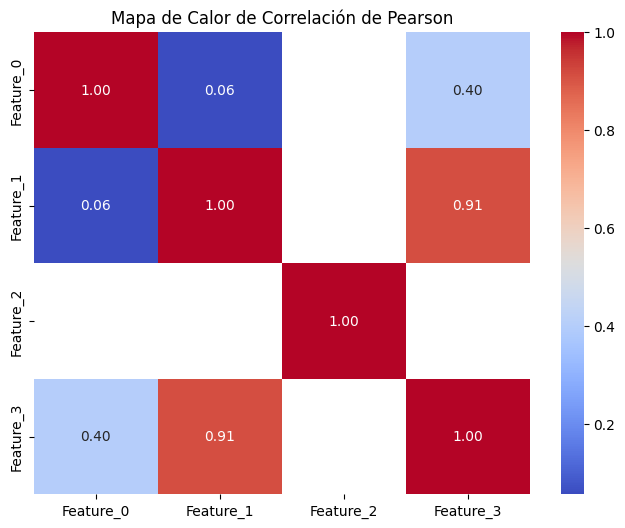

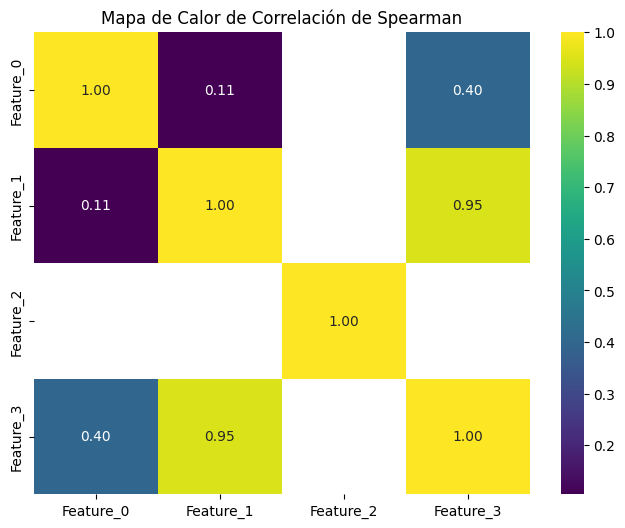

In [8]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation
from pyspark.sql import SparkSession
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Importar numpy para manejar la matriz

# Iniciar una sesión de Spark si no la tienes (para entornos fuera de Databricks/Jupyter con Spark ya inicializado)
# spark = SparkSession.builder.appName("CorrelationPlotting").getOrCreate()

data = [(Vectors.sparse(4, [(0, 1.0), (3, -2.0)]),),
        (Vectors.dense([4.0, 5.0, 0.0, 3.0]),),
        (Vectors.dense([6.0, 7.0, 0.0, 8.0]),),
        (Vectors.sparse(4, [(0, 9.0), (3, 1.0)]),)]
df = spark.createDataFrame(data, ["features"])

# Calcular la matriz de correlación de Pearson
r1 = Correlation.corr(df, "features").head()
pearson_corr_matrix = r1[0].toArray() # Convertir a un array de NumPy para facilidad

print("Pearson correlation matrix (from PySpark):\n" + str(r1[0]))

# Calcular la matriz de correlación de Spearman
r2 = Correlation.corr(df, "features", "spearman").head()
spearman_corr_matrix = r2[0].toArray() # Convertir a un array de NumPy para facilidad

print("\nSpearman correlation matrix (from PySpark):\n" + str(r2[0]))

# --- Visualización con Seaborn y Matplotlib ---

# 1. Visualizar la matriz de correlación de Pearson
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=[f'Feature_{i}' for i in range(pearson_corr_matrix.shape[1])],
            yticklabels=[f'Feature_{i}' for i in range(pearson_corr_matrix.shape[0])])
plt.title('Mapa de Calor de Correlación de Pearson')
plt.show()

# 2. Visualizar la matriz de correlación de Spearman
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='viridis', fmt=".2f",
            xticklabels=[f'Feature_{i}' for i in range(spearman_corr_matrix.shape[1])],
            yticklabels=[f'Feature_{i}' for i in range(spearman_corr_matrix.shape[0])])
plt.title('Mapa de Calor de Correlación de Spearman')
plt.show()

# Si necesitas convertir a DataFrame de Pandas para otras manipulaciones
# df_pearson_corr = pd.DataFrame(pearson_corr_matrix,
#                                columns=[f'Feature_{i}' for i in range(pearson_corr_matrix.shape[1])],
#                                index=[f'Feature_{i}' for i in range(pearson_corr_matrix.shape[0])])
# print("\nPearson Correlation DataFrame:\n", df_pearson_corr)

# df_spearman_corr = pd.DataFrame(spearman_corr_matrix,
#                                 columns=[f'Feature_{i}' for i in range(spearman_corr_matrix.shape[1])],
#                                 index=[f'Feature_{i}' for i in range(spearman_corr_matrix.shape[0])])
# print("\nSpearman Correlation DataFrame:\n", df_spearman_corr)